# 주제 : <br>우리 애는 머리는 좋은데, 공부를 안해서 그래요 - 데이터로 살펴보는 우리 아이 학습 성공/실패 요소
----------

## 데이터 소개
    - 이번 주제는 xAPI-Edu-Data 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    
    xAPI-Edu-Data.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    
    gender: 학생의 성별 (M: 남성, F: 여성)
    
    NationaliTy: 학생의 국적
    
    PlaceofBirth: 학생이 태어난 국가
    
    StageID: 학생이 다니는 학교 (초,중,고)
    
    GradeID: 학생이 속한 성적 등급
    
    SectionID: 학생이 속한 반 이름
    
    Topic: 수강한 과목
    
    Semester: 수강한 학기 (1학기/2학기)
    
    Relation: 주 보호자와 학생의 관계
    
    raisedhands: 학생이 수업 중 손을 든 횟수
    
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    
    Discussion: 학생이 토론 그룹에 참여한 횟수
    
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data
- Citation : 

**Amrieh, E. A., Hamtini, T., & Aljarah, I. (2016). Mining Educational Data to Predict Student’s academic Performance using Ensemble Methods. International Journal of Database Theory and Application, 9(8), 119-136.**

**Amrieh, E. A., Hamtini, T., & Aljarah, I. (2015, November). Preprocessing and analyzing educational data set using X-API for improving student's performance. In Applied Electrical Engineering and Computing Technologies (AEECT), 2015 IEEE Jordan Conference on (pp. 1-5). IEEE.**

## 최종 목표
    - 연구용 Tabular 데이터의 이해
    
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    
    - Scikit-learn 기반의 모델 학습 방법 습득
    
    - Logistic Regression, XGBoost 기반의 모델 학습 방법 습득
    
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사(FastCampus)
---

## Step 0. 의료 데이터셋에 대하여

### 연구용 데이터의 목적


### 연구용 데이터의 인용


## Step 1. 데이터셋 준비하기

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [25]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('C:/Users/pc/fastcampus/part-1---머신러닝-분류-모델/Part 1 - 머신러닝 분류 모델/Chapter 2 - 우리 애는 머리는 좋은데 공부를 안해서 그래요/xAPI-Edu-Data.csv')

In [26]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [5]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head(-5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,M,Palestine,Jordan,MiddleSchool,G-08,A,History,F,Father,81,86,86,41,Yes,Good,Under-7,M
471,M,Palestine,Jordan,MiddleSchool,G-08,A,History,S,Father,78,82,78,53,Yes,Good,Under-7,M
472,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,F,Father,80,87,74,68,Yes,Good,Under-7,M
473,M,Palestine,Palestine,MiddleSchool,G-08,A,Geology,S,Father,85,88,79,70,Yes,Good,Under-7,M


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [27]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [28]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [29]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [30]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
Iran             6
USA              6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [31]:
df['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Tunis            9
Egypt            9
Syria            6
Lybia            6
Iran             6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

### 문제 5. 수치형 데이터의 히스토그램 그리기


In [32]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='raisedhands', ylabel='Count'>

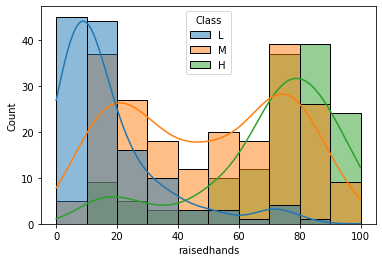

In [33]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
sns.histplot(x = 'raisedhands',hue='Class',data=df, kde = True, hue_order=['L','M','H'])

유용한 데이터

<AxesSubplot:xlabel='VisITedResources', ylabel='Count'>

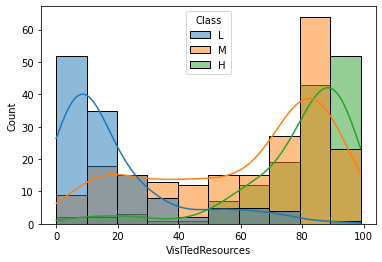

In [34]:
sns.histplot(x = 'VisITedResources',hue='Class',data=df, kde = True, hue_order=['L','M','H'])

<AxesSubplot:xlabel='AnnouncementsView', ylabel='Count'>

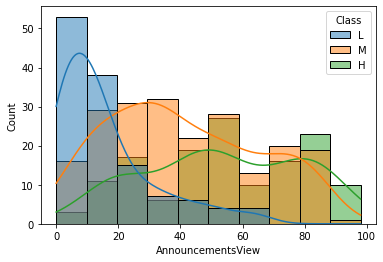

In [35]:
sns.histplot(x = 'AnnouncementsView',hue='Class',data=df, kde = True, hue_order=['L','M','H'])

<AxesSubplot:xlabel='Discussion', ylabel='Count'>

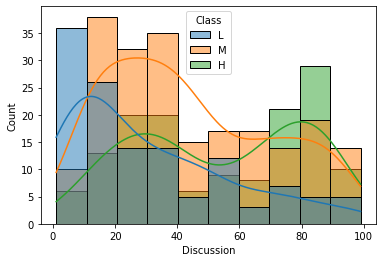

In [36]:
sns.histplot(x = 'Discussion',hue='Class',data=df, kde = True, hue_order=['L','M','H'])

**토론횟수는 판단하기 힘들다**

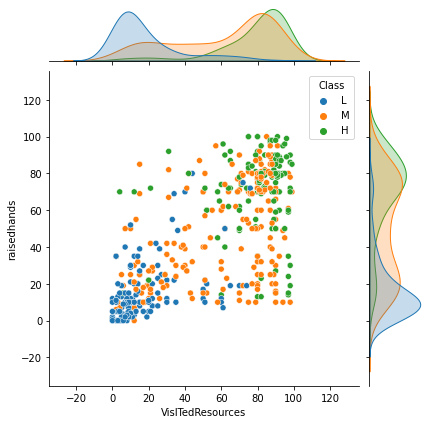

In [40]:
sns.jointplot(x = 'VisITedResources',y = 'raisedhands', data=df,
              hue='Class',hue_order=['L','M','H'])

2d space 상에서는 L,M의 구별은 어느정도 가능하지만 M,H의 구별은 쉽지 않다

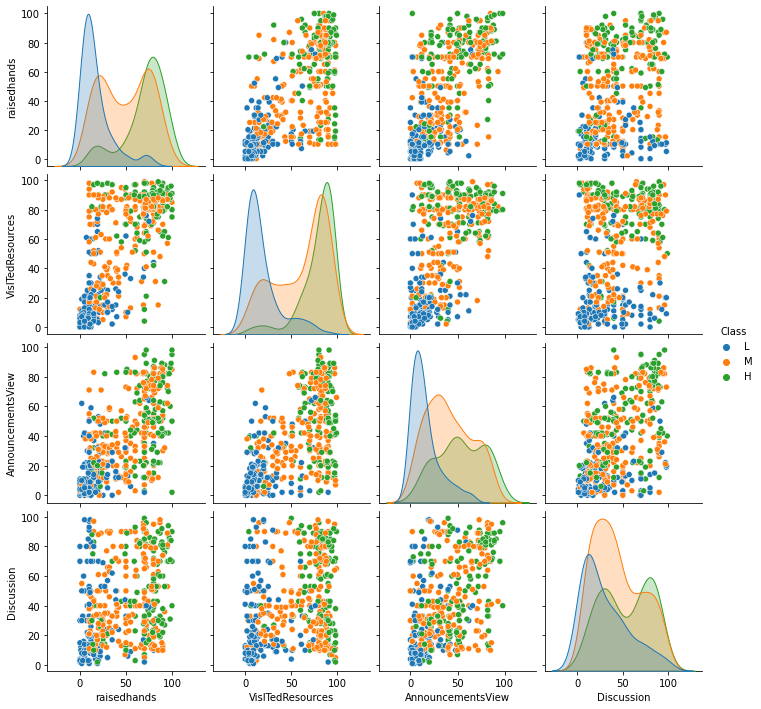

In [42]:
sns.pairplot(df, hue='Class',hue_order=['L','M','H'] )

우리가 분석하려는 대상과의 상관관계가 좋아야 한다.
feature 끼리는 상관관계가 낮을수록 서로 다른측면으로 분석을 하는것에 도움을 주기때문에 좋다고 할 수 있다.


### 문제 6. Countplot을 이용하여 범주별 통계 확인하기


<AxesSubplot:xlabel='Class', ylabel='count'>

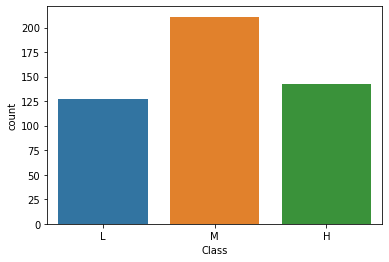

In [43]:
# seaborn의 countplot()을 사용
# Hint) x와 hue를 사용하여 범주별 Class 통계 확인

sns.countplot(x='Class', data=df,order=['L','M','H'])



<AxesSubplot:xlabel='gender', ylabel='count'>

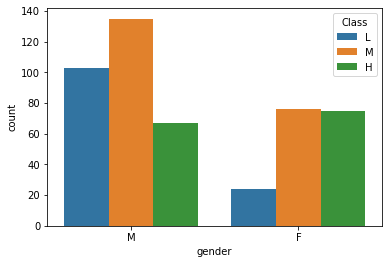

In [46]:
sns.countplot(x='gender', data=df,hue='Class',hue_order=['L','M','H'])


In [47]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

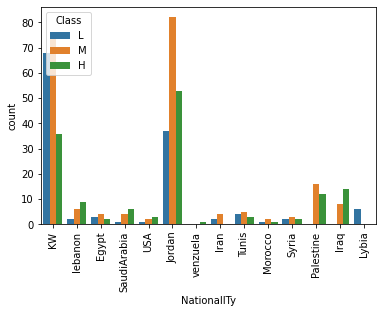

In [49]:
sns.countplot(x='NationalITy', data=df,hue='Class',hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()

이러한 그래프들은 상관성들을 파악하기 위한 분석이다.
따라서, 그래프결과만 보고 일반화 하여 해석하면 안된다. 
통계적 확률로 나타내는것이다. 주의해야한다

<AxesSubplot:xlabel='ParentAnsweringSurvey', ylabel='count'>

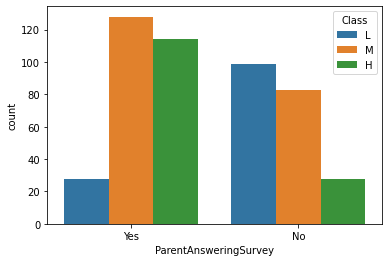

In [50]:
sns.countplot(x='ParentAnsweringSurvey', data=df,hue='Class',hue_order=['L','M','H'])


<AxesSubplot:xlabel='ParentschoolSatisfaction', ylabel='count'>

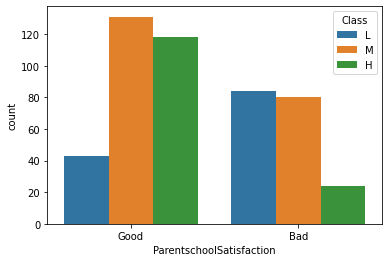

In [51]:
sns.countplot(x='ParentschoolSatisfaction', data=df,hue='Class',hue_order=['L','M','H'])


성적이 좋기때문에 만족했을거라고 생각이든다
이 변수같은 경우는 성적이 나오고 나서 파악한 답변일수도 있기때문에
분석을 할때 제외하고 해야 할 듯 싶다.

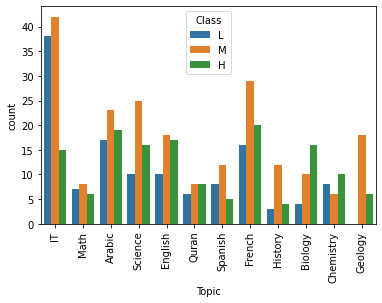

In [53]:
sns.countplot(x='Topic', data=df,hue='Class',hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()

### 문제 7. 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [54]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용
df['Class_value'] = df['Class'].map(dict(L=-1, M=0, H=1))
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


<BarContainer object of 2 artists>

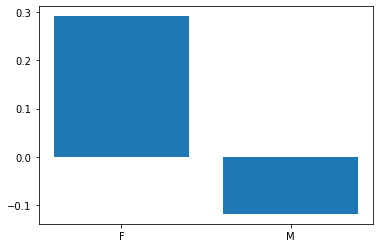

In [56]:
gb=df.groupby('gender').mean()['Class_value']
plt.bar(gb.index,gb)

<BarContainer object of 12 artists>

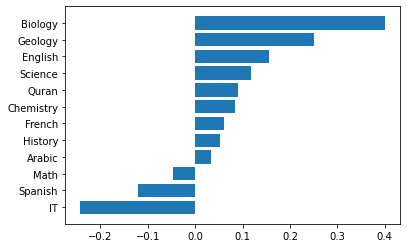

In [59]:
gb=df.groupby('Topic').mean()['Class_value'].sort_values()
plt.barh(gb.index,gb)

<BarContainer object of 2 artists>

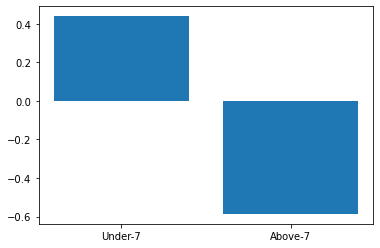

In [61]:
gb=df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values(ascending=False)
plt.bar(gb.index,gb)

성실이 최고다 라는 것을 알수있다.

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 8. get_dummies()를 이용하여 범주형 데이터 전처리하기


In [68]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [69]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정

X = pd.get_dummies(df.drop(['ParentschoolSatisfaction','Class','Class_value'], axis=1), 
                   columns=['gender', 'NationalITy', 'PlaceofBirth',
                                'StageID', 'GradeID',
                               'SectionID', 'Topic', 'Semester', 'Relation',
                            'ParentAnsweringSurvey',
                               'StudentAbsenceDays'],
                  drop_first=True)
y = df['Class']



In [70]:
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
476,50,77,14,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
478,30,17,14,57,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### 문제 9. 학습데이터와 테스트데이터 분리하기


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 10. Logistic Regression 모델 생성/학습하기


In [73]:
from sklearn.linear_model import LogisticRegression

In [75]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)



LogisticRegression(max_iter=10000)

### 문제 11. 모델 학습 결과 평가하기


In [76]:
from sklearn.metrics import classification_report

In [77]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.79      0.79      0.79        33
           M       0.60      0.68      0.64        56

    accuracy                           0.70       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.71      0.70      0.70       144



### 문제 12. XGBoost 모델 생성/학습하기


In [78]:
from xgboost import XGBClassifier

In [79]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)



C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:53:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 문제 13. 모델 학습 결과 평가하기


In [81]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.79      0.69      0.74        55
           L       0.85      0.85      0.85        33
           M       0.65      0.73      0.69        56

    accuracy                           0.74       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.75      0.74      0.74       144



## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Logistic Regression 모델 계수로 상관성 파악하기

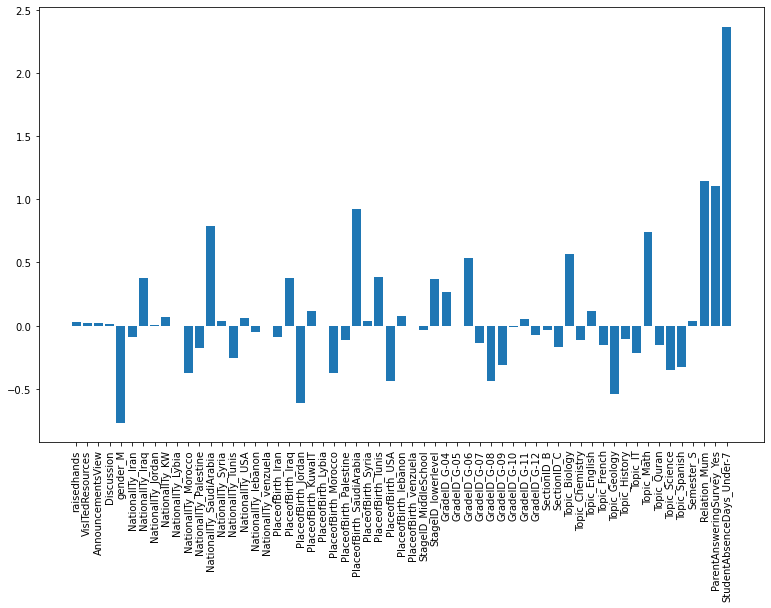

In [99]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(13,8))

plt.bar(X.columns, model_lr.coef_[0,:])
plt.xticks(rotation = 90)
plt.show()

### 문제 15. XGBoost 모델로 특징의 중요도 확인하기

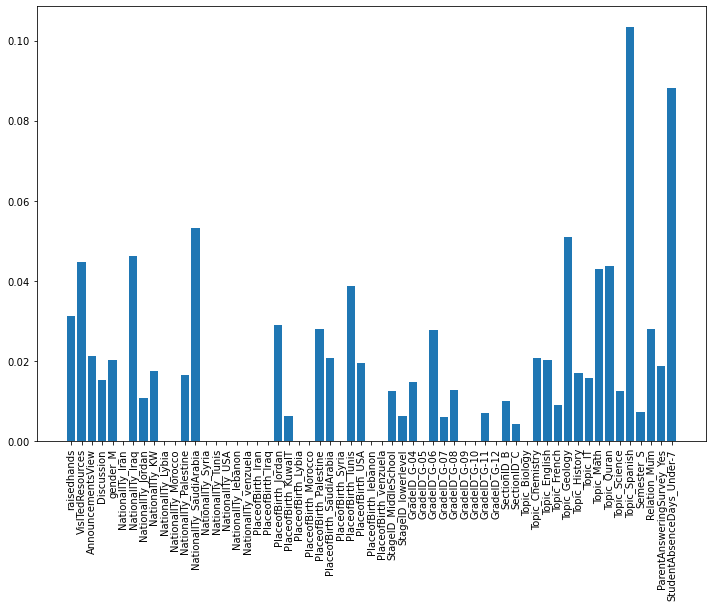

In [94]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(12,8))

plt.bar(X.columns,model_xgb.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

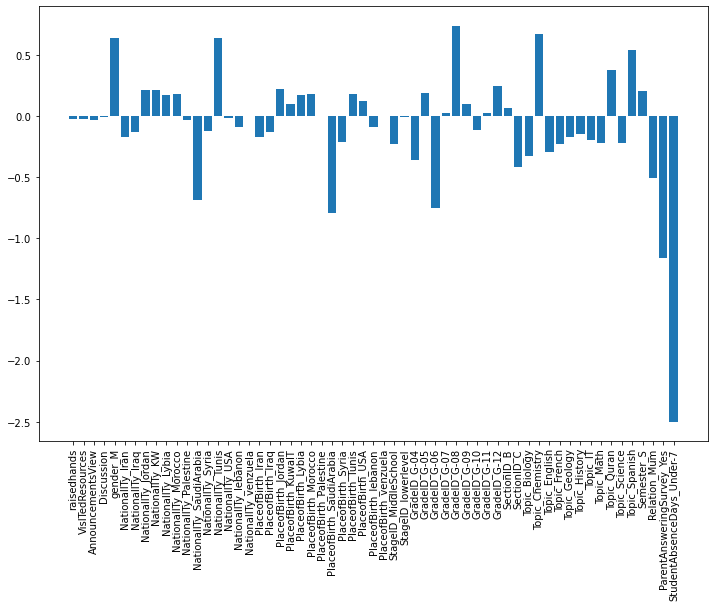

In [96]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(12,8))

plt.bar(X.columns, model_lr.coef_[1,:])
plt.xticks(rotation = 90)
plt.show()